Project Title - Demand Forecasting for a Retail Store

Project Level - Intermediate Level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Shrushti\\Downloads\\avocado.csv\\avocado.csv")

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df_albany = df[(df['region'] == 'Albany') & (df['type'] == 'conventional')].copy()
df_albany['Date'] = pd.to_datetime(df_albany['Date'])
df_albany.sort_values('Date', inplace=True)
df_albany.set_index('Date', inplace=True)

In [6]:
weekly_sales = df_albany['Total Volume'].resample('W').sum()

In [20]:
train = weekly_sales[:'2017']
test = weekly_sales['2018':]

In [26]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,52))  
results = model.fit()

In [22]:
forecast = results.predict(start=test.index[0], end=test.index[-1], dynamic=False)

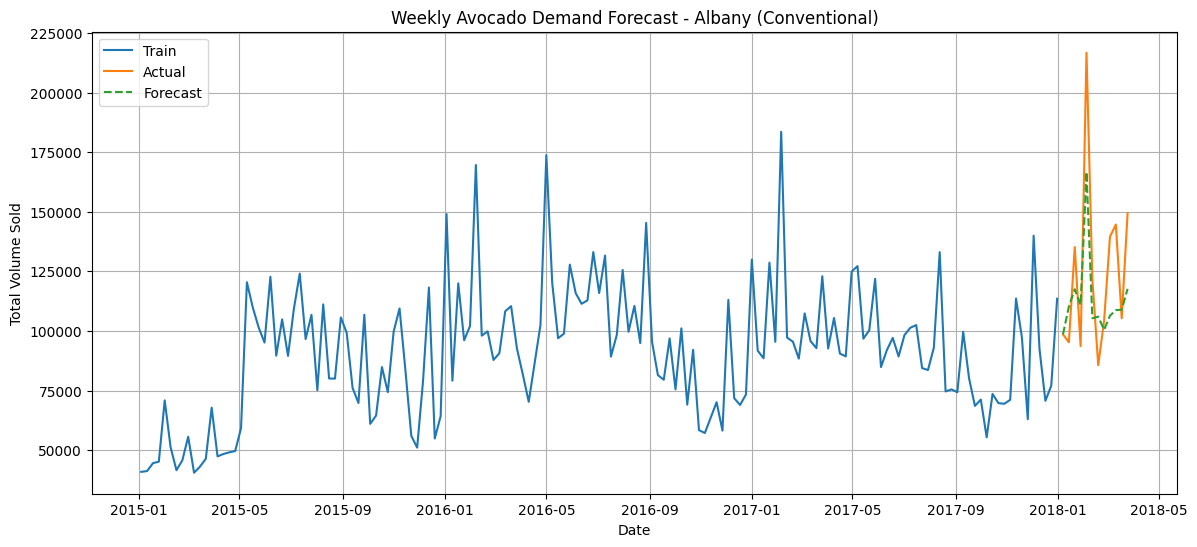

In [15]:
plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Weekly Avocado Demand Forecast - Albany (Conventional)')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 20420.48
Root Mean Squared Error (RMSE): 24910.21
